In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

### Time series data

이 시계열 자료에서 입력 순서열과 target 값을 만든다. 입력 순서열은 3 스텝 크기의 순서열을 사용하고 target으로는 그 다음 시간 스텝의 값을 사용한다. 즉, 3개의 순서열을 입력한 다음 마지막 출력값이 target과 일치하게 만드는 sequence-to-value (many-to-one) 문제를 풀어보도록 한다.

Keras 에서 RNN 을 사용하려면 입력 데이터는 (nb_samples, timesteps, input_dim) 크기를 가지는 ndim=3인 3차원 텐서(tensor) 형태이어야 한다.

nb_samples: 자료의 수
timesteps: 순서열의 길이
input_dim: x 벡터의 크기
여기에서는 단일 시계열이므로 input_dim = 1 이고 3 스텝 크기의 순서열을 사용하므로 timesteps = 3 이며 자료의 수는 18 개이다.

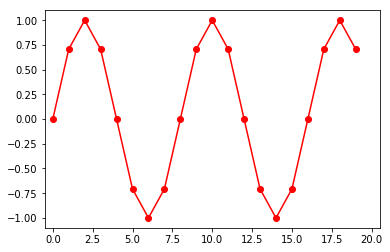

In [2]:
s = np.sin(2 * np.pi * 0.125 * np.arange(20))
plt.plot(s, 'ro-')
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.show()

In [3]:
from scipy.linalg import toeplitz
S = np.fliplr(toeplitz(np.r_[s[-1], np.zeros(s.shape[0] - 2)], s[::-1]))
S[:5, :3]

array([[  0.00000000e+00,   7.07106781e-01,   1.00000000e+00],
       [  7.07106781e-01,   1.00000000e+00,   7.07106781e-01],
       [  1.00000000e+00,   7.07106781e-01,   1.22464680e-16],
       [  7.07106781e-01,   1.22464680e-16,  -7.07106781e-01],
       [  1.22464680e-16,  -7.07106781e-01,  -1.00000000e+00]])

In [4]:
X_train = S[:-1, :3][:, :, np.newaxis]
Y_train = S[:-1, 3]
X_train.shape, Y_train.shape

((18, 3, 1), (18,))

In [5]:
X_train[:4]

array([[[  0.00000000e+00],
        [  7.07106781e-01],
        [  1.00000000e+00]],

       [[  7.07106781e-01],
        [  1.00000000e+00],
        [  7.07106781e-01]],

       [[  1.00000000e+00],
        [  7.07106781e-01],
        [  1.22464680e-16]],

       [[  7.07106781e-01],
        [  1.22464680e-16],
        [ -7.07106781e-01]]])

In [6]:
Y_train[:4]

array([  7.07106781e-01,   1.22464680e-16,  -7.07106781e-01,
        -1.00000000e+00])

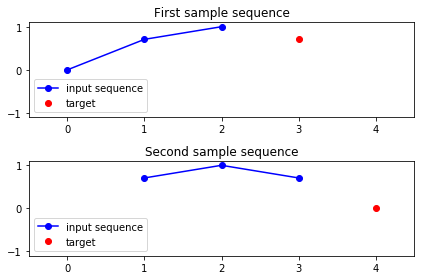

In [7]:
plt.subplot(211)
plt.plot([0, 1, 2], X_train[0].flatten(), 'bo-', label="input sequence")
plt.plot([3], Y_train[0], 'ro', label="target")
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("First sample sequence")
plt.subplot(212)
plt.plot([1, 2, 3], X_train[1].flatten(), 'bo-', label="input sequence")
plt.plot([4], Y_train[1], 'ro', label="target")
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Second sample sequence")
plt.tight_layout()
plt.show()

### SimpleRNN of Keras

In [8]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

np.random.seed(0)
model = Sequential()
model.add(SimpleRNN(10, input_shape=(3, 1)))
model.add(Dense(1, activation="linear"))
model.compile(loss='mse', optimizer='sgd')

Using TensorFlow backend.


#### before train data graph

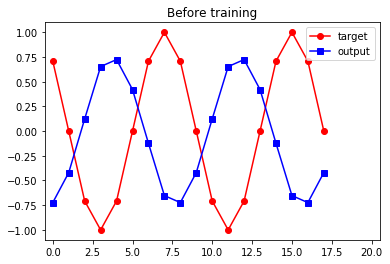

In [9]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model.predict(X_train[:,:,:]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Before training")
plt.show()

#### fit model

In [10]:
history = model.fit(X_train, Y_train, epochs=100, verbose=0)

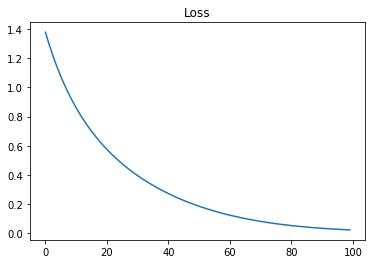

In [11]:
plt.plot(history.history["loss"])
plt.title("Loss")
plt.show()

#### after train data graph

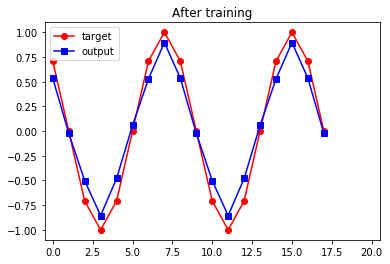

In [12]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model.predict(X_train[:,:,:]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("After training")
plt.show()